In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy
import pandas as pn
from datetime import datetime
import gsw
from holteandtalley import HolteAndTalley
import os

In [2]:
data = pn.DataFrame(data=np.empty([9,9]),columns = ['depth','temp','salt','lat','lon','year','month','day','profile#'])

In [3]:
#Opening the CTD data 1980-2021 WOD
k=1
for i in os.listdir("/Users/nyelab/Downloads/ocldb1619571763.24492.CTD/"):
    if i.startswith("wo"):
        string = '/Users/nyelab/Downloads/ocldb1619571763.24492.CTD/'+i
        array = xr.open_dataset(string)
        data2 = pn.DataFrame(data = array.Temperature, columns = ['temp'])
        try:
            data2['salt'] = array.Salinity
            depth = array.z.values
            Lon = array.lon.values
            Lat = array.lat.values
            year = pn.to_datetime(array.time.values).year
            month = pn.to_datetime(array.time.values).month
            day = pn.to_datetime(array.time.values).day
            data2['depth'] = depth
            data2['year']=year
            data2['month']=month
            data2['day']=day
            data2['lat']=Lat
            data2['lon']=Lon
            data2['profile#']=k
            k=k+1
            data = data.append(data2)
            array.close()
        except:
            an_array = np.empty((len(data2)))
            an_array[:] = np.NaN
            data2['salt'] = an_array
            depth = array.z.values
            Lon = array.lon.values
            Lat = array.lat.values
            year = pn.to_datetime(array.time.values).year
            month = pn.to_datetime(array.time.values).month
            day = pn.to_datetime(array.time.values).day
            data2['depth'] = depth
            data2['year']=year
            data2['month']=month
            data2['day']=day
            data2['lat']=Lat
            data2['lon']=Lon
            data2['profile#']=k
            k=k+1
            data = data.append(data2)
            array.close()

In [4]:
an_array = np.empty((len(data2)))


an_array[:] = np.NaN

an_array


array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan])

In [28]:
data

,depth,temp,salt,lat,lon,year,month,day,profile#,pressure,SA,CT,sigma,mldT,mldS,mldr
0,-2.000000,-1.494578e-154,2.618548e-322,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,-2.011035,2.618548e-322,0.015191,-0.155542,NaN,NaN,NaN
1,0.000000,0.000000e+00,0.000000e+00,0.000000,6.945282e-310,6.945282e-310,0.0,0.0,0.0,0.000000,0.000000e+00,0.015284,-0.155536,NaN,NaN,NaN
2,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000e+00,0.015284,-0.155536,NaN,NaN,NaN
3,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000e+00,0.015284,-0.155536,NaN,NaN,NaN
4,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000e+00,0.015284,-0.155536,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35,37.702877,7.970000e+00,3.189100e+01,40.726002,-7.187800e+01,1.998000e+03,7.0,30.0,14781.0,37.999944,3.204236e+01,8.005649,24.840429,NaN,NaN,NaN
36,38.694969,7.940000e+00,3.188800e+01,40.726002,-7.187800e+01,1.998000e+03,7.0,30.0,14781.0,38.999947,3.203935e+01,7.975502,24.842355,NaN,NaN,NaN
37,39.687050,7.930000e+00,3.189000e+01,40.726002,-7.187800e+01,1.998000e+03,7.0,30.0,14781.0,39.999944,3.204136e+01,7.965343,24.845361,NaN,NaN,NaN
38,40.679131,7.930000e+00,3.189800e+01,40.726002,-7.187800e+01,1.998000e+03,7.0,30.0,14781.0,40.999946,3.204941e+01,7.965125,24.851658,NaN,NaN,NaN


In [29]:
data['profile#'].max()

14781.0

In [5]:
data['pressure'] = gsw.p_from_z(-1*data['depth'].values,data['lat'].values)

In [6]:
data['SA'] = gsw.SA_from_SP(data.salt.values,data.pressure.values, data.lon.values, data.lat.values)

In [7]:
data['CT'] = gsw.CT_from_t(data.SA.values, data.temp.values, data.pressure.values)

/Users/nyelab/miniconda3/lib/python3.8/site-packages/gsw/_wrapped_ufuncs.py:696: RuntimeWarning: invalid value encountered in ct_from_t
  return _gsw_ufuncs.ct_from_t(SA, t, p)


In [8]:
data['sigma'] = gsw.sigma0(data.SA.values, data.CT.values)

In [9]:
mixeddf = pn.DataFrame(columns = ['lat','lon','year','month','day','profile#','mldT','mldS','mldr'])
mixeddf

,lat,lon,year,month,day,profile#,mldT,mldS,mldr


In [30]:
data['mldT']=np.nan
data['mldS']=np.nan
data['mldr']=np.nan
for i in range(14781):
    try:
        profile = data[data['profile#']==i]
        mlds = HolteAndTalley(profile.pressure.values,profile.temp.values,profile.salt.values,profile.sigma.values)
        data.mldT[data['profile#']==i] = mlds.tempMLD
        data.mldS[data['profile#']==i] = mlds.salinityMLD
        data.mldr[data['profile#']==i] = mlds.densityMLD
        mixeddf=mixeddf.append({'lat':profile['lat'][0],'lon':profile['lon'][0],
                        'year':profile['year'][0],'month':profile['month'][0],
                        'day':profile['day'][0],'profile#':profile['profile#'][0],
                        'mldT':mlds.tempMLD, 'mldS':mlds.salinityMLD, 'mldr':mlds.densityMLD},ignore_index=True)
    except:
        pass

/Users/nyelab/miniconda3/lib/python3.8/site-packages/holteandtalley/profile.py:42: RuntimeWarning: invalid value encountered in true_divide
  mltBestFit = np.max(np.argwhere((errors/errorsum)> 10**-10))
/Users/nyelab/miniconda3/lib/python3.8/site-packages/holteandtalley/profile.py:42: RuntimeWarning: invalid value encountered in true_divide
  mltBestFit = np.max(np.argwhere((errors/errorsum)> 10**-10))
/Users/nyelab/miniconda3/lib/python3.8/site-packages/holteandtalley/profile.py:42: RuntimeWarning: invalid value encountered in true_divide
  mltBestFit = np.max(np.argwhere((errors/errorsum)> 10**-10))
/Users/nyelab/miniconda3/lib/python3.8/site-packages/holteandtalley/profile.py:42: RuntimeWarning: invalid value encountered in true_divide
  mltBestFit = np.max(np.argwhere((errors/errorsum)> 10**-10))
/Users/nyelab/miniconda3/lib/python3.8/site-packages/holteandtalley/profile.py:42: RuntimeWarning: invalid value encountered in true_divide
  mltBestFit = np.max(np.argwhere((errors/errors

In [ ]:
#mixeddf['mldr'][mixeddf['mldr']<0]=np.nan

In [ ]:
#mixeddf[mixeddf['lat']>40.75]=np.nan

In [31]:
mixeddf

,lat,lon,year,month,day,profile#,mldT,mldS,mldr
0,40.615002,-71.883331,2013.0,3.0,30.0,2.0,10.999983,9.999986,9.999986
1,41.276669,-71.251663,2000.0,2.0,24.0,3.0,13.999980,13.500000,11.999983
2,39.978333,-71.498337,2001.0,2.0,14.0,4.0,39.846102,39.000000,39.000000
3,41.099998,-71.644997,2006.0,8.0,16.0,5.0,11.444423,10.500000,9.999986
4,40.000000,-72.176666,2018.0,5.0,26.0,6.0,10.499985,10.000000,9.999987
...,...,...,...,...,...,...,...,...,...
12700,41.014999,-71.896667,2007.0,9.0,28.0,14774.0,9.999986,10.999985,9.999986
12701,39.044998,-72.855003,2016.0,4.0,19.0,14775.0,50.999936,12.000000,12.000000
12702,38.330002,-74.235001,2008.0,9.0,14.0,14776.0,10.952360,10.000000,10.000000
12703,41.211666,-72.868332,2000.0,9.0,25.0,14777.0,10.999985,-8.000000,9.999986


In [32]:
np.unique(mixeddf.year)

array([1981., 1982., 1983., 1984., 1987., 1988., 1989., 1990., 1991.,
       1992., 1993., 1994., 1995., 1996., 1997., 1998., 1999., 2000.,
       2001., 2002., 2003., 2004., 2005., 2006., 2007., 2008., 2009.,
       2010., 2011., 2012., 2013., 2014., 2015., 2016., 2017., 2018.,
       2019.])

In [33]:
def mixed_MAM_JJA(year, dataframe):
    mlyear = dataframe[dataframe['year']==year]
    mlyearMAM_1 = mlyear[mlyear['month']>=3]
    mlyearMAM = mlyearMAM_1[mlyearMAM_1['month']<=5]
    mlyearJJA_1=mlyear[mlyear['month']>=6]
    mlyearJJA = mlyearJJA_1[mlyearJJA_1['month']<=8]
    return mlyearMAM, mlyearJJA

In [34]:
[mam1998, jja1998] = mixed_MAM_JJA(1998,mixeddf)

In [36]:
mam1998

,lat,lon,year,month,day,profile#,mldT,mldS,mldr
63,38.745998,-73.126999,1998.0,3.0,4.0,83.0,31.874955,25.999961,25.999961
121,38.605000,-74.945000,1998.0,5.0,27.0,152.0,9.999987,9.999987,9.999987
158,40.027000,-72.410004,1998.0,3.0,18.0,195.0,20.999968,-86.500000,-86.500000
293,39.520000,-73.837997,1998.0,3.0,12.0,349.0,14.999978,-84.500000,-84.500000
352,39.995998,-72.975998,1998.0,5.0,30.0,417.0,10.333319,9.999987,9.999987
...,...,...,...,...,...,...,...,...,...
12340,39.660999,-72.926003,1998.0,5.0,30.0,14336.0,11.999983,9.999986,9.999986
12357,39.875999,-73.445999,1998.0,5.0,30.0,14357.0,9.999986,9.999986,9.999986
12534,40.490002,-72.277000,1998.0,3.0,18.0,14574.0,18.999973,-169.000000,-169.000000
12580,38.450001,-73.822998,1998.0,5.0,27.0,14624.0,10.999984,10.000000,10.000000


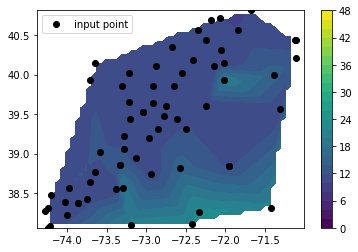

In [39]:
cp_djf= jja1998['mldT']
cplon_djf = jja1998['lon']
cplat_djf = jja1998['lat']

from scipy.interpolate import LinearNDInterpolator
#cp, cplat, cplon
x = cplon_djf

y = cplat_djf

z = cp_djf

X = np.linspace(min(x), max(x))

Y = np.linspace(min(y), max(y))

X, Y = np.meshgrid(X, Y)  # 2D grid for interpolation

interp = LinearNDInterpolator(list(zip(x, y)), z)

Z = interp(X, Y)

#plt.pcolormesh(X, Y, Z,vmax = 20,vmin = 0 )#shading='auto'
plt.contourf(X, Y, Z,levels = np.arange(0,50,2),vmin=0)#shading='auto'
plt.plot(x, y, "ok", label="input point")

plt.legend()

plt.colorbar()

plt.axis("equal")

plt.show()

In [41]:
data_uor = pn.DataFrame(data=np.empty([9,9]),columns = ['depth','temp','salt','lat','lon','year','month','day','profile#'])

In [42]:
#Opening the UOR data 1980-2021 WOD
k=1
for i in os.listdir("/Users/nyelab/Downloads/ocldb1619571763.24492.UOR/"):
    if i.startswith("wo"):
        string = '/Users/nyelab/Downloads/ocldb1619571763.24492.UOR/'+i
        array = xr.open_dataset(string)
        data2 = pn.DataFrame(data = array.Temperature, columns = ['temp'])
        try:
            data2['salt'] = array.Salinity
            depth = array.z.values
            Lon = array.lon.values
            Lat = array.lat.values
            year = pn.to_datetime(array.time.values).year
            month = pn.to_datetime(array.time.values).month
            day = pn.to_datetime(array.time.values).day
            data2['depth'] = depth
            data2['year']=year
            data2['month']=month
            data2['day']=day
            data2['lat']=Lat
            data2['lon']=Lon
            data2['profile#']=k
            k=k+1
            data_uor = data_uor.append(data2)
            array.close()
        except:
            an_array = np.empty((len(data2)))
            an_array[:] = np.NaN
            data2['salt'] = an_array
            depth = array.z.values
            Lon = array.lon.values
            Lat = array.lat.values
            year = pn.to_datetime(array.time.values).year
            month = pn.to_datetime(array.time.values).month
            day = pn.to_datetime(array.time.values).day
            data2['depth'] = depth
            data2['year']=year
            data2['month']=month
            data2['day']=day
            data2['lat']=Lat
            data2['lon']=Lon
            data2['profile#']=k
            k=k+1
            data_uor = data_uor.append(data2)
            array.close()

In [44]:
data_uor['profile#'].max()

35014.0

In [46]:
data_uor['pressure'] = gsw.p_from_z(-1*data_uor['depth'].values,data_uor['lat'].values)

In [47]:
data_uor['SA'] = gsw.SA_from_SP(data_uor.salt.values,data_uor.pressure.values, data_uor.lon.values, data_uor.lat.values)

In [48]:
data_uor['CT'] = gsw.CT_from_t(data_uor.SA.values, data_uor.temp.values, data_uor.pressure.values)

In [49]:
data_uor['sigma'] = gsw.sigma0(data_uor.SA.values, data_uor.CT.values)

In [50]:
mixeddf_uor = pn.DataFrame(columns = ['lat','lon','year','month','day','profile#','mldT','mldS','mldr'])
mixeddf_uor

,lat,lon,year,month,day,profile#,mldT,mldS,mldr


In [ ]:
data_uor['mldT']=np.nan
data_uor['mldS']=np.nan
data_uor['mldr']=np.nan
for i in range(35014):
    try:
        profile = data_uor[data_uor['profile#']==i]
        mlds = HolteAndTalley(profile.pressure.values,profile.temp.values,profile.salt.values,profile.sigma.values)
        data_uor.mldT[data['profile#']==i] = mlds.tempMLD
        data_uor.mldS[data['profile#']==i] = mlds.salinityMLD
        data_uor.mldr[data['profile#']==i] = mlds.densityMLD
        mixeddf_uor=mixeddf_uor.append({'lat':profile['lat'][0],'lon':profile['lon'][0],
                        'year':profile['year'][0],'month':profile['month'][0],
                        'day':profile['day'][0],'profile#':profile['profile#'][0],
                        'mldT':mlds.tempMLD, 'mldS':mlds.salinityMLD, 'mldr':mlds.densityMLD},ignore_index=True)
    except:
        pass